# Citation and image classification


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import networkx as nx
import csv
from operator import itemgetter
import community

from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score as CH
from sklearn.metrics import davies_bouldin_score as DB
from sklearn.metrics import silhouette_score as SS

import seaborn as sns


In [ ]:
# or upload on Google Drive and mount your drive (faster than 'files')
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
feature_matrix = pd.read_csv("/content/drive/My Drive/Data science /feature_matrix.csv",header=None)
adjacency_matrix = pd.read_csv("/content/drive/My Drive/Data science /adjacency_matrix.csv",header=None)

fashion_train = pd.read_csv("/content/drive/My Drive/Data science /fashion-mnist_train.csv")
fashion_test = pd.read_csv("/content/drive/My Drive/Data science /fashion-mnist_test.csv")

# Task 1  Unsupervised learning: text documents with an associated citation graph 

## Task 1.1 Clustering of the feature matrix 

In [ ]:
# Seaerch for the optimal clustering using CH score

CH_Score1=[]
#To evaluate intra-cluster similarity and inter-cluster differences, use David Bouldin Index
DB_Score1=[]
#To evaluate the pairwise difference of betweenand within-cluster distances, use Silhouette score.
SS_Score1=[]
Switch=True
for k in range(2, 31):
    kmeans_model = KMeans(n_clusters=k).fit(feature_matrix)
    labels = kmeans_model.labels_
    if Switch and CH(feature_matrix, labels)<7:
      opk=k
      print('First clustering with CH < 7, Cluster size=',opk)
      Switch=False
    CH_Score1.append(CH(feature_matrix, labels))
    DB_Score1.append(DB(feature_matrix, labels))
    SS_Score1.append(SS(feature_matrix, labels))


First clustering with CH < 7, Cluster size= 24


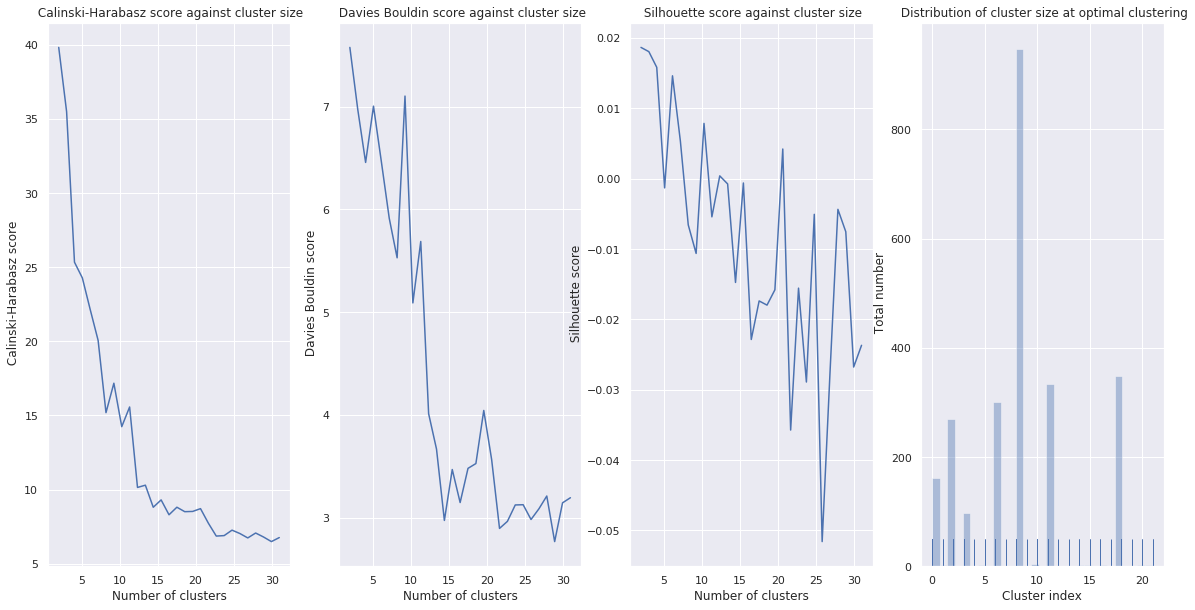

In [ ]:
#Plot the  Calinski-Harabasz (CH) score to evaluate the quality of clusterings as a function of k

x=np.linspace(2,31,len(CH_Score1))
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(141)
sns.set(style="darkgrid")
ax1=sns.lineplot(x,CH_Score1)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel(' Calinski-Harabasz score')
ax1.set_title(' Calinski-Harabasz score against cluster size')

#Plot Davies Bouldin Index
#To evaluate intra-cluster similarity and inter-cluster differences, use Davies Bouldin Index
ax2 = fig.add_subplot(142)
sns.set(style="darkgrid")
ax2=sns.lineplot(x,DB_Score1)
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel(' Davies Bouldin score')
ax2.set_title(' Davies Bouldin score against cluster size')

#Plot Silhouette score
#To evaluate the pairwise difference of between and within-cluster distances
ax3 = fig.add_subplot(143)
sns.set(style="darkgrid")
ax3=sns.lineplot(x,SS_Score1)
ax3.set_xlabel('Number of clusters')
ax3.set_ylabel(' Silhouette score')
ax3.set_title(' Silhouette score against cluster size')

#Plot the distribution of cluster sizes
kmeans_model = KMeans(n_clusters=22, random_state=1).fit(feature_matrix)
labels = kmeans_model.labels_
ax4 = fig.add_subplot(144)
ax4 = sns.distplot(labels, kde=False, rug=True)
ax4.set_xlabel('Cluster index')
ax4.set_ylabel(' Total number')
ax4.set_title(' Distribution of cluster size at optimal clustering');


The mathematical formula for Calinski-Harabasz(CH) score is:$$\begin{aligned}\frac{tr(B_k)}{tr(W_k)}\frac{m-k}{k-1} \end{aligned}$$. Where m is the number of training set samples and k is the number of clusters. $B_k$ is the inter-cluster covariance matrix , and $W_k$ is the intra-cluster covariance matrix. $tr$ is the trace of the matrix. Our purpose is to get cluster that has more intra-cluster similarity and inter-cluster dissimilarity therefore relatively large CH score suits our purpose. \\
Davies Bouldin index measures the average similarity between each cluster and its most similar one, averaged over all the cluster, the minimum value is zero and the lower the better. \\
Silhouette score is calculated using the mean intra-cluster distance $(a)$ and the mean nearest-cluster distance $(b)$ for each sample such that $$\begin{aligned} Score=\frac{b-a}{max(a,b)} \end{aligned}$$, which ranges in $[-1,1]$, if $score$ is close to 1, it means that the clustering of sample i is reasonable, if $score$ is close to -1, the cluster is not reasonable.

When the cluster is at 24, the CH score and silihouette score reaches local peak, the Davies Bouldin index is also relatively low. In the optimal clustering, large amount of feature data was attributed to one of the cluster and there are cluster with less than 10 data. 


In [ ]:
#To evaluate the robustness of the results given the randomness of k-means optimisation
#The k-means cluster chooses random centroids and after some iterations the centroids converges which means it rarely changes.
kmeans_model_100 = KMeans(n_clusters=opk,  max_iter=100).fit(feature_matrix)
kmeans_model_200 = KMeans(n_clusters=opk,  max_iter=200).fit(feature_matrix)
kmeans_model_300 = KMeans(n_clusters=opk,  max_iter=300).fit(feature_matrix)
kmeans_model_400 = KMeans(n_clusters=opk,  max_iter=400).fit(feature_matrix)

if (kmeans_model_100.cluster_centers_.all()==kmeans_model_200.cluster_centers_.all()==kmeans_model_300.cluster_centers_.all()==kmeans_model_400.cluster_centers_.all()):
  print('Same final cluster centroids after different amount of iterations')


Same final cluster centroids after different amount of iterations


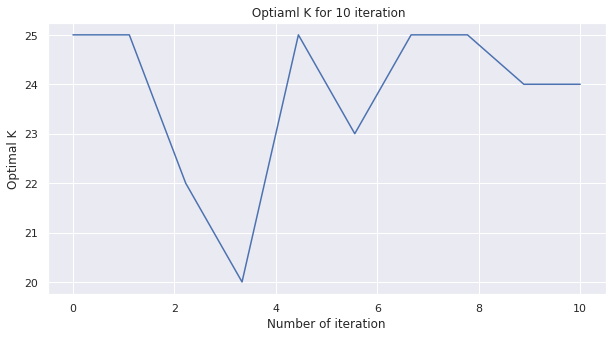

In [ ]:
# Rerun the process of finding optiaml number of k cluster with different initial point
opt=[]
for i in range(10):
  Switch=True
  for k in range(19, 28):
    kmeans_model = KMeans(n_clusters=k).fit(feature_matrix)
    labels = kmeans_model.labels_
    if Switch and CH(feature_matrix, labels)<7:
      opt.append(k)
      Switch=False

x=np.linspace(0,10,len(opt))
fig = plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax1=sns.lineplot(x,opt)
ax1.set_xlabel('Number of iteration')
ax1.set_ylabel('Optimal K')
ax1.set_title(' Optiaml K for 10 iteration');

Regardless of different initial random centroids started, the final centroids all converges to the same after different amount of iteration as long as the iteration is sufficient large and we see that our optimal k number of cluster converges within the range 19-28 although it varies by litle due to inherent randomness.

## Task 1.2 Analysis of the citation graph


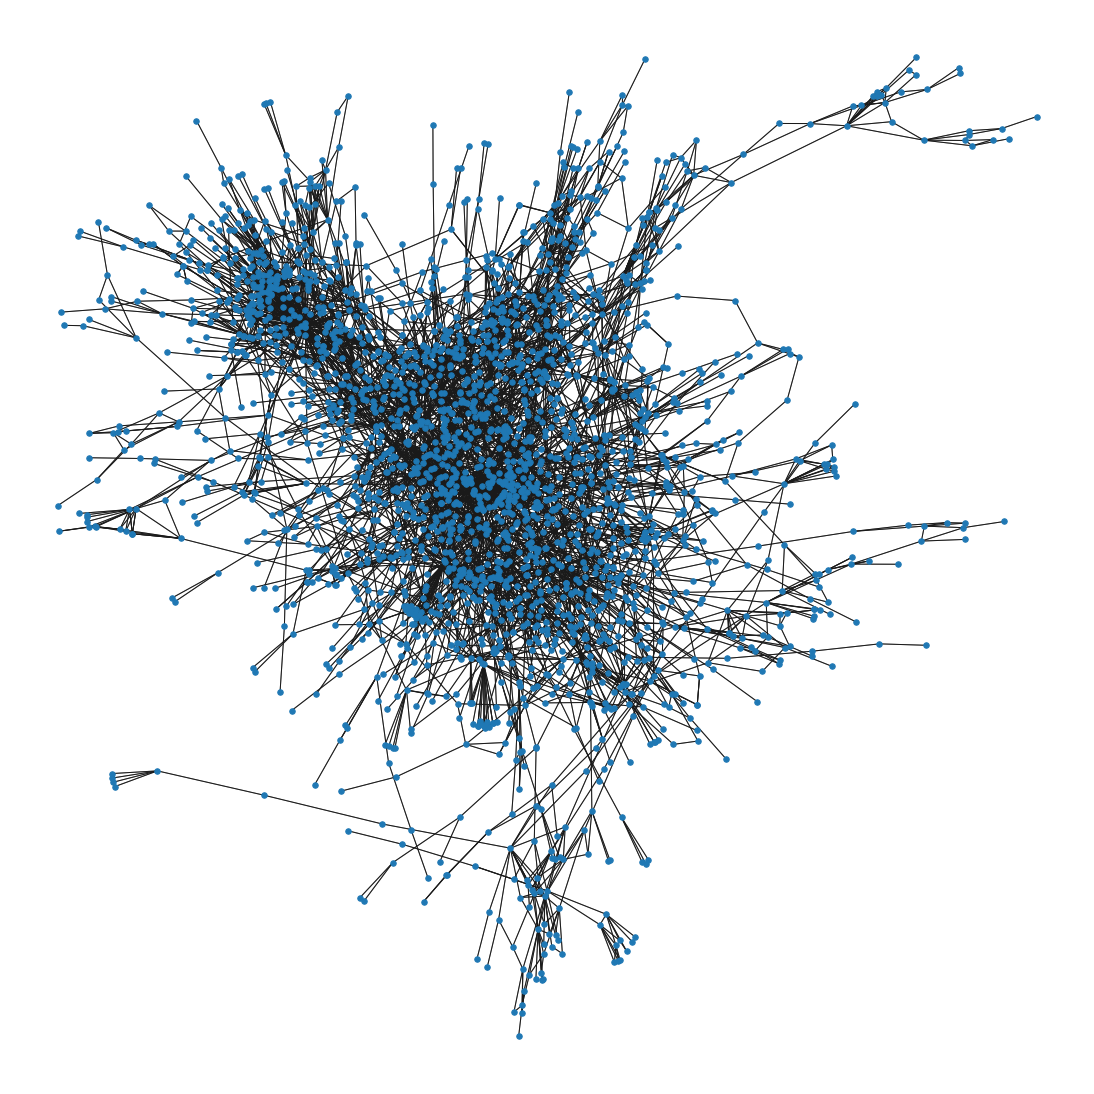

In [ ]:
#Display the citation graph by adjacency matrix

G = nx.from_numpy_matrix(adjacency_matrix.values)
fig = plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=False, node_size = 30)
nx.draw_networkx_edges(G, pos, alpha=0.5)

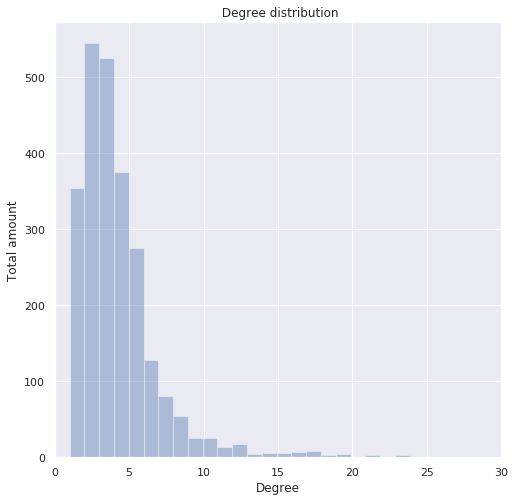

In [ ]:
#Plot node degree distribution
degrees = [d for i, d in G.degree()]

plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
ax1 = sns.distplot(degrees,max(degrees),kde=False )
ax1.set_xlabel('Degree')
ax1.set_ylabel('Total amount')
ax1.set_title(' Degree distribution')
ax1.set_xlim(left=0,right=30);

In [ ]:
#Compute the three centrality measures 
from networkx.algorithms import centrality
degrees = centrality.degree_centrality(G)
betweenness = centrality.betweenness_centrality(G)
pagerank = nx.pagerank(G)

#Find which nodes are highly central according to the three measures
print('highest degree centrality measure node index=',max(degrees, key=degrees.get))
print('highest betweenness centrality measure node index=',max(betweenness, key=betweenness.get))
print('highest pagerank centrality measure node index=',max(pagerank, key=pagerank.get))

highest degree centrality measure node index= 1245
highest betweenness centrality measure node index= 1245
highest pagerank centrality measure node index= 1245


<Figure size 1440x720 with 0 Axes>

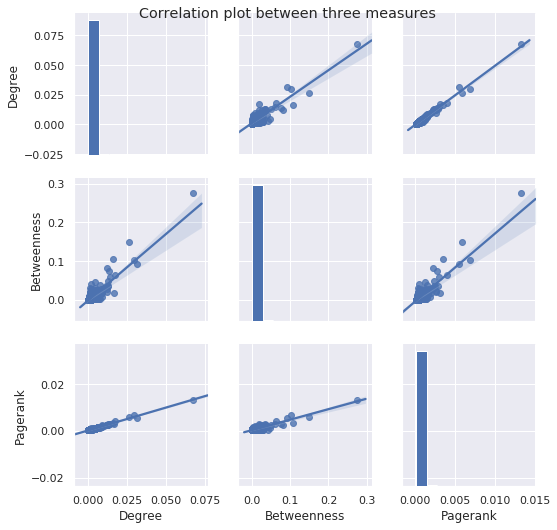

In [ ]:
#Combine the three measure data into dataframe and plot the correlation
Data = {'Degree': degrees, 'Betweenness': betweenness, 'Pagerank': pagerank}
Df = pd.DataFrame(Data, columns= ['Degree', 'Betweenness', 'Pagerank'])

fig = plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.pairplot(Df,kind='reg')
ax.fig.suptitle('Correlation plot between three measures');


In [ ]:
#Rank the three centrality measures and combine them to dataframe
sort_degrees = [key for (key, value) in sorted(degrees.items(), key=lambda item: item[1],reverse=True)]
sort_betweenness = [key for (key, value) in sorted(betweenness.items(), key=lambda item: item[1],reverse=True)]
sort_pagerank = [key for (key, value) in sorted(pagerank.items(), key=lambda item: item[1],reverse=True)]

Data = {'Degree': sort_degrees, 'Betweenness': sort_betweenness, 'Pagerank': sort_pagerank}
Ranking = pd.DataFrame(Data, columns= ['Degree', 'Betweenness', 'Pagerank'])
Ranking.head(5)

,Degree,Betweenness,Pagerank
0,1245,1245,1245
1,271,1846,1563
2,1563,1894,1846
3,1846,1563,271
4,1672,271,1672


From the above plot, all of the centrality measures are postive correlated. It is obvious to see the relation from their definition. The higher the degree of a node, the more nodes are connected to that node. Betweenness centrality is a measure of centrality based on shortest paths, the more nodes connected, the higher possibility it connects to shortest paths. Pagerank is to measure the possiblity of the nodes work as an agent, the more path it connects the higher possiblity it will work as an agent. Although node 1245 is the highest rank in all of the three measures, they are different for the other top 5 nodes. 
* When we have large amount of nodes that only connects to each other then that is high dgree with low betweeness. 
* When we have a node that connects to some edge nodes then is will be low degree high betweeness. \\

Similar with pagerank, if there is a node linked to the most connected nodes but has fewer other nodes connected, it can still increase the rank in Pagerank.

## Task 1.3 Community detection on the citation graph 

In [ ]:
#Clauset-Newman-Moore greedy modularity maximisation algorithm 
from networkx.algorithms.community import greedy_modularity_communities
Num_com = list(greedy_modularity_communities(G))

print('The optimal number of community is {}'.format(len(Num_com)))

NameError: ignored

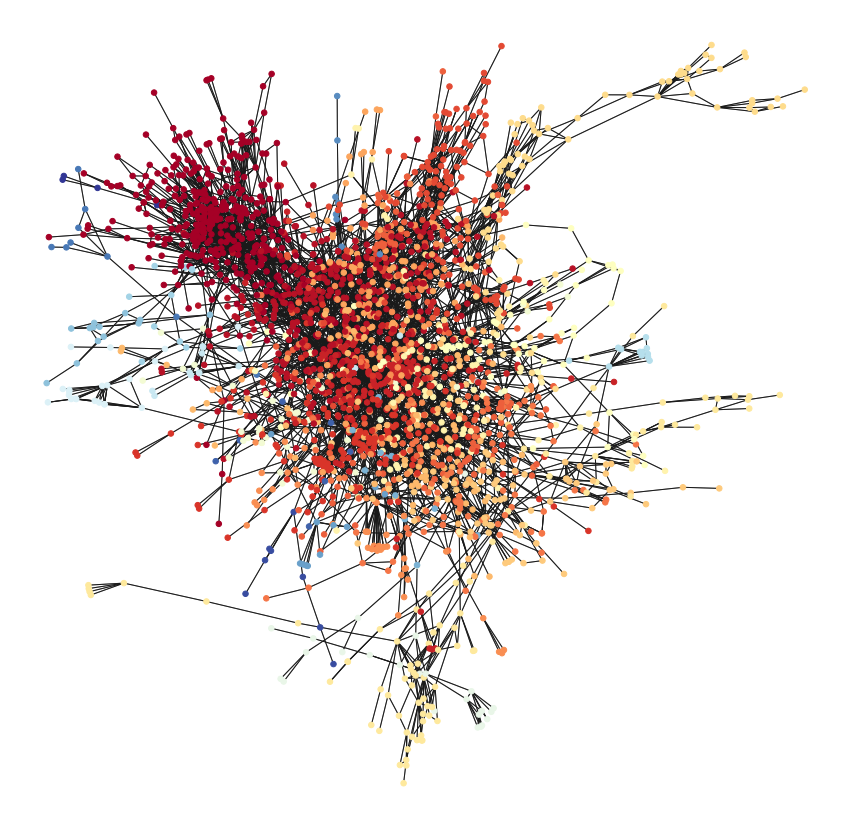

In [ ]:
#Change the frozen set to a dictionary
j=0
partition=dict()
for value in Num_com:
  for i in list(value):
    partition.update({i:j})
  j+=1
#Sort the dictionary
partition = dict(sorted(partition.items()))

#Compute graph layout
plt.figure(figsize=(15, 15)) 
plt.axis('off')
nx.draw(G, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show(G)

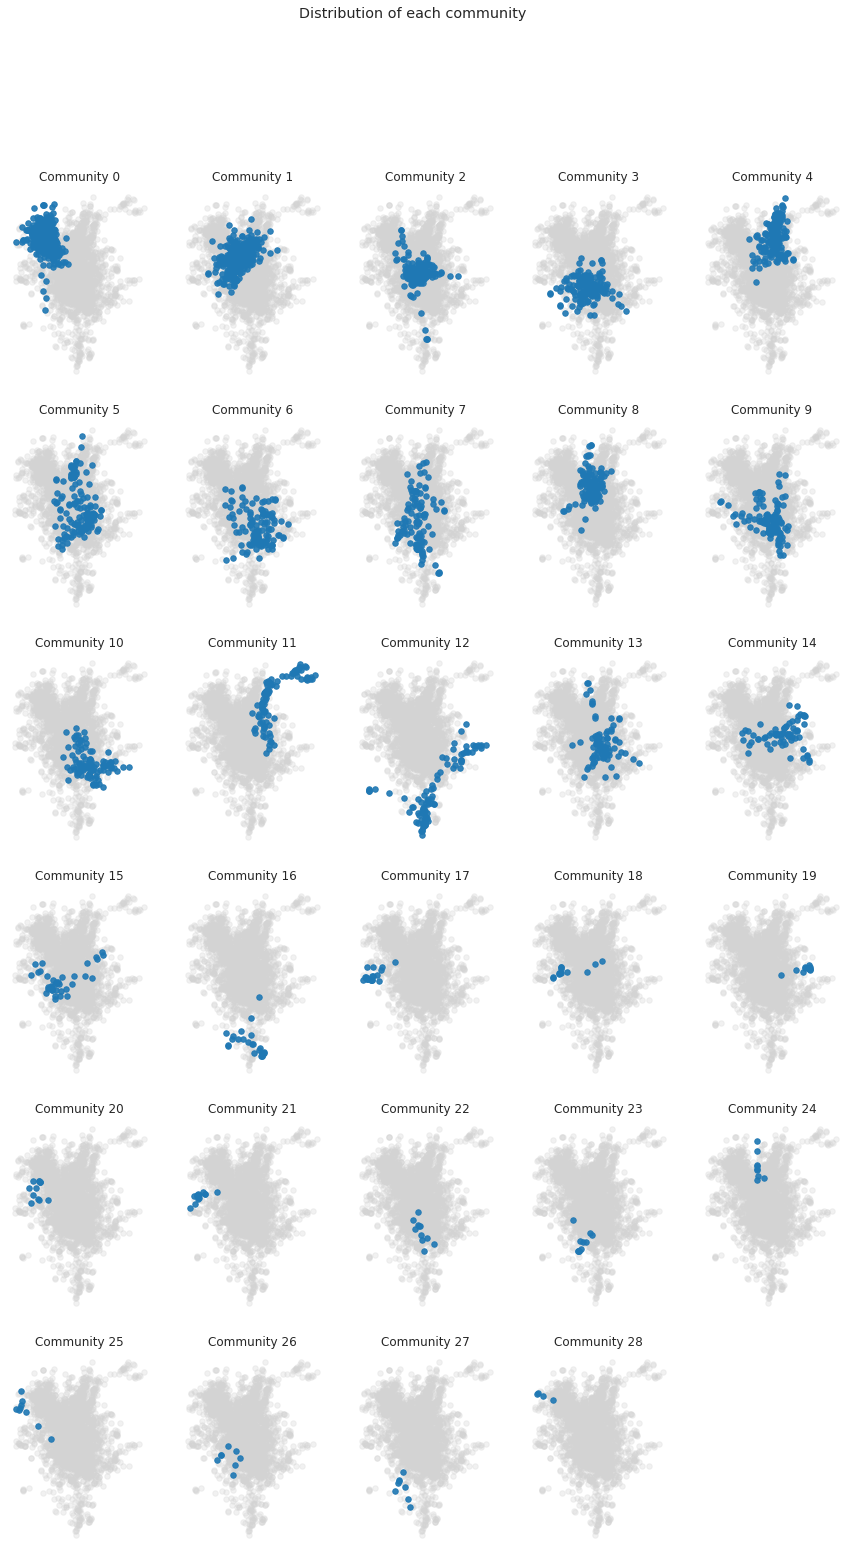

In [ ]:
# Visualize each community is distributed
plt.figure(figsize=(15,25))

for i in range(len(Num_com)):
  ax = plt.subplot(6, 5, i+1)
  Num = Num_com[i]
  plt.axis('off')
  plt.title('Community %i'%i)
  nx.draw_networkx_nodes(G,pos,node_size=30,alpha=0.3,node_color='lightgrey')
  nx.draw_networkx_nodes(G,pos,node_size=30,alpha=0.9,cmap=plt.cm.RdYlBu, nodelist=list(Num))
  nx.draw_networkx_edges(G,pos,edge_color='white')
plt.suptitle('Distribution of each community')
plt.show()

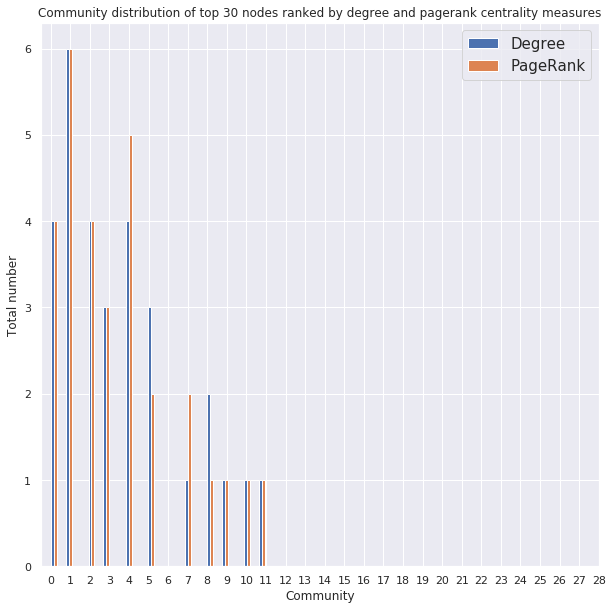

In [ ]:
#Study how the top 30 most central nodes according to degree and Pagerank computed in 1.2 are distributed across your k* communities

#Select top 30 index from degree and pagerank
degree_30=Ranking['Degree'].head(30).to_numpy()
pagerank_30=Ranking['Pagerank'].head(30).to_numpy()

#Get the community index for the top 30 index
degree_30_ind=[]
pagerank_30_ind=[]
for i in degree_30:
  degree_30_ind.append(partition.get(i))
for i in pagerank_30:
  pagerank_30_ind.append(partition.get(i))

#Plot the distribution plot
plt.figure(figsize=(10,10))
plt.hist([degree_30_ind,pagerank_30_ind],len(Num_com), label=['Degree', 'PageRank'])
plt.xticks(range(len(Num_com)))
plt.xlabel('Community')
plt.ylabel('Total number')
plt.legend(fontsize=15)
plt.title('Community distribution of top 30 nodes ranked by degree and pagerank centrality measures');

The distribution is skewed to the right, as we see that the first community has the most nodes and follows by a decending order. The graph based method using adjacency matrix groups the ones that are most cited together within each other, the first few communities stored the nodes with higher connection to other nodes and those nodes are like a paper that was cited most in one discipline.

## Task 1.4 Compare feature and graph clusterings

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

kmeans_model = KMeans(n_clusters=opk).fit(feature_matrix)
labels1 = kmeans_model.labels_
#Group labels to list
la=dict()
for ind,i in enumerate(labels1):
  la.update({ind:i})
  
labels2=list(partition.values())

print('AMI Score of two optimal clustering methods is {}'.format(adjusted_mutual_info_score(labels1, labels2))) 
print('ARI Score of two optimal clustering methods is {}'.format(adjusted_rand_score(labels1, labels2))) 

AMI Score of two optimal clustering methods is 0.1674656731996175
ARI Score of two optimal clustering methods is 0.08489540069391642


$$\begin{aligned} ARI=\frac{RI-Expected[RI]}{max(RI)-Expected[RI]} \end{aligned}$$ 
Adjusted rand score is a similarity measure between two clusters by considering all pairs of samples and counting pairs that are assigned for the clusters.
$$\begin{aligned} AMI(a,b)=\frac{MI(a,b)-Expected[MI(a,b)]}{avg(H(a),H(b))-Expected[MI(a,b)]} \end{aligned}$$ 
AMI is used to measure the consistency of the two distributions. The value range is [-1,1]. The larger the value, the more consistent the clustering effect is with the real situation. (a,b) are the two cluster

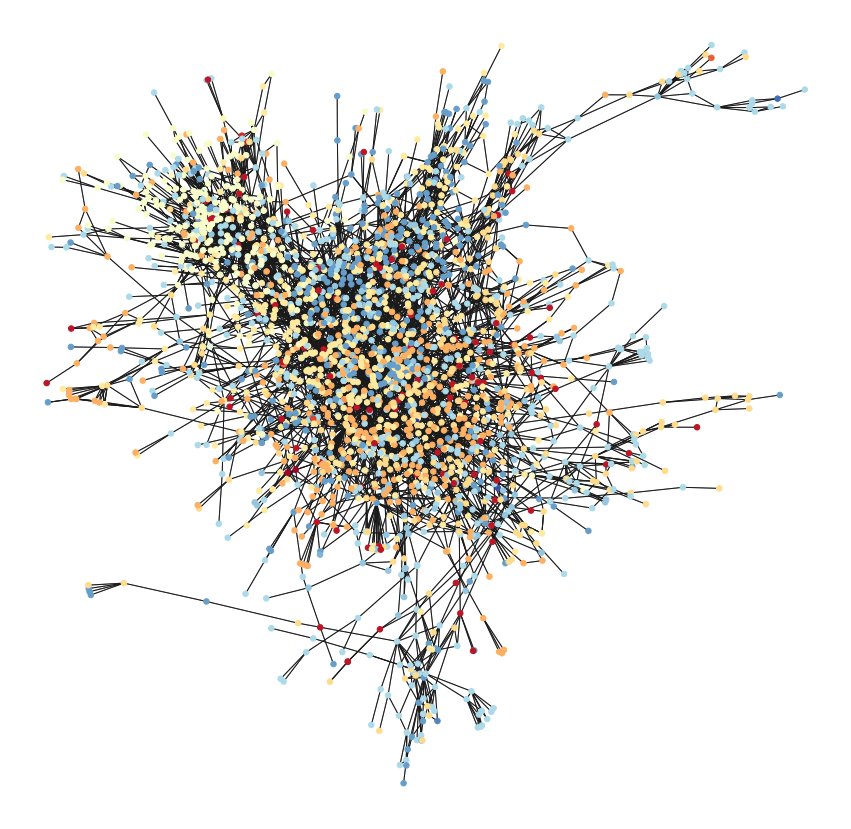

In [ ]:
#Compute graph layout
plt.figure(figsize=(15, 15)) 
plt.axis('off')
nx.draw(G, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=labels1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show(G)

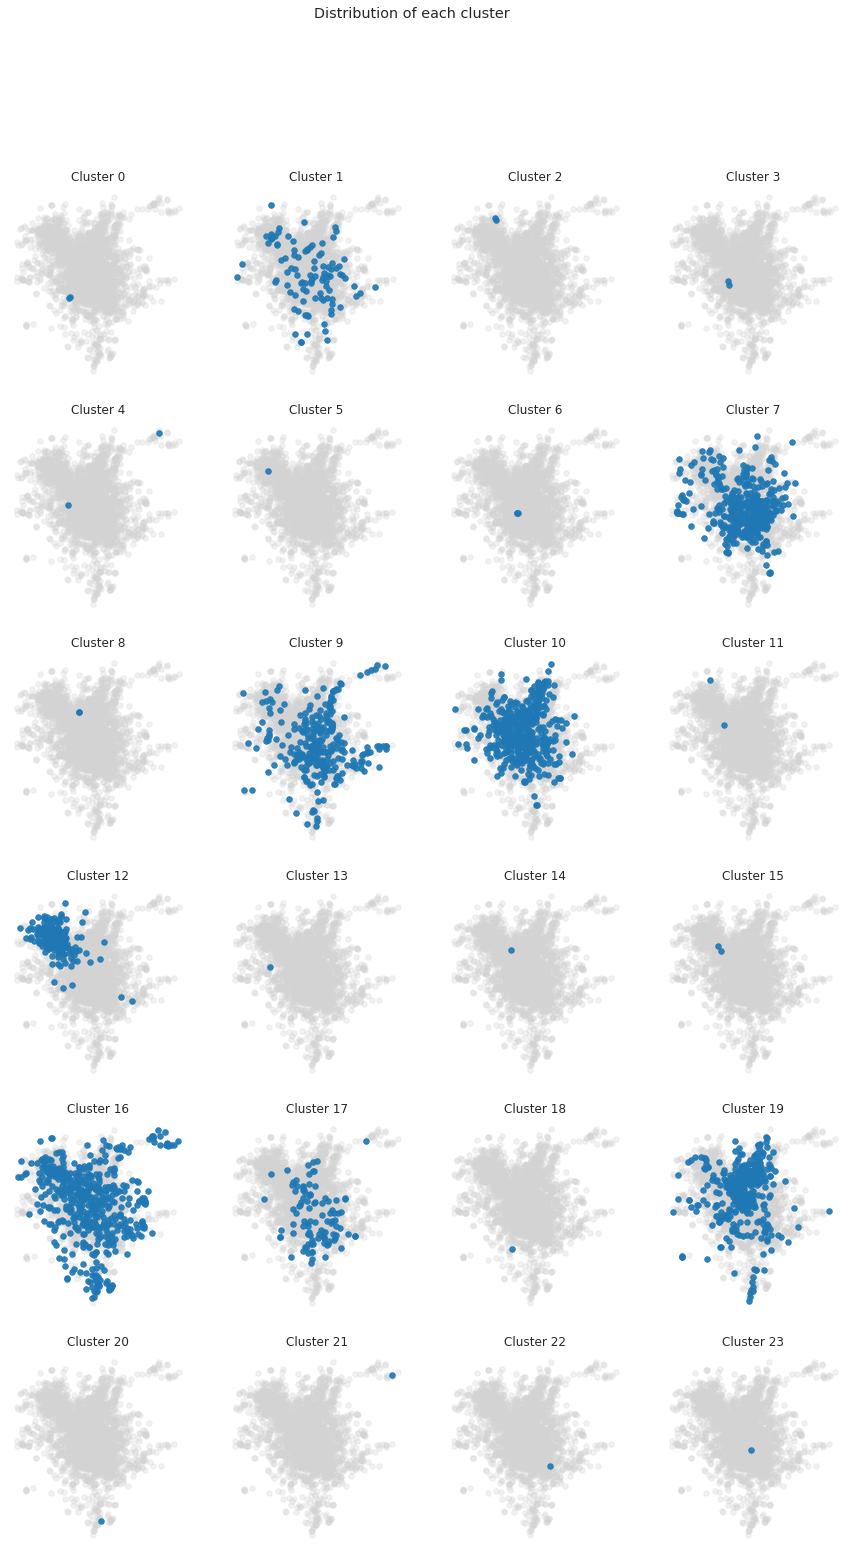

In [ ]:
# Visualize each community is distributed
plt.figure(figsize=(15,25))

for i in range(opk):
  ax = plt.subplot(6, 4, i+1)
  list_val=[]
  for key,val in la.items():
    if i==val:
      list_val.append(key)
  plt.axis('off')
  nx.draw_networkx_nodes(G,pos,node_size=30,alpha=0.3,node_color='lightgrey')
  nx.draw_networkx_nodes(G,pos,node_size=30,alpha=0.9,cmap=plt.cm.RdYlBu, nodelist=list_val)
  nx.draw_networkx_edges(G,pos,edge_color='white')
  plt.title('Cluster %i'%i)
plt.suptitle('Distribution of each cluster')
plt.show()

For graph clustering, the nodes are distributed more evenly than feature clustering, both ARI and AMI score shows a really small similarity score which can show k-means clustering is different with graph clustering. Note there are certain words often used in scientific journal which can cause papers to be in same cluster with feature clustering. Also if the papers are from same discipline then they are likely to end up in same communities. This indicates that if two papers from different discipline but use similar wording style can be in same cluster with feature clustering but in different communities with graph clustering therefore feature clustering and graph clustering has low similarities scores. Since our goal is to group documents with similar content, graph clustering is better in this case, we should increase the size of word dictionary to better distinguish document contents with feature clustering. 

# Task 2 Classification of a set of images

## Task 2.1 Unsupervised clustering of the image dataset 

In [ ]:
# Seaerch for the optimal clustering using CH score

#Seprate label data
X_train=fashion_train.loc[:, fashion_train.columns != 'label']
Y_train=np.squeeze(fashion_train.loc[:, fashion_train.columns == 'label'])
X_test=fashion_test.loc[:, fashion_test.columns != 'label']
Y_test=np.squeeze(fashion_test.loc[:, fashion_test.columns == 'label'])
Y_train_N=list(Y_train)
Y_test_N=list(Y_test)



In [ ]:
CH_Score = []
#To evaluate intra-cluster similarity and inter-cluster differences, use David Bouldin Index
DB_Score = []
#To evaluate the pairwise difference of betweenand within-cluster distances, use Silhouette score.
SS_Score = []
Switch = True
for k in range(2, 31):
    kmeans_model = KMeans(n_clusters=k,max_iter=100,tol=0.001).fit(X_train)
    labels = kmeans_model.labels_
    CH_Score.append(CH(X_train, labels))
    DB_Score.append(DB(X_train, labels))
    SS_Score.append(SS(X_train, labels))

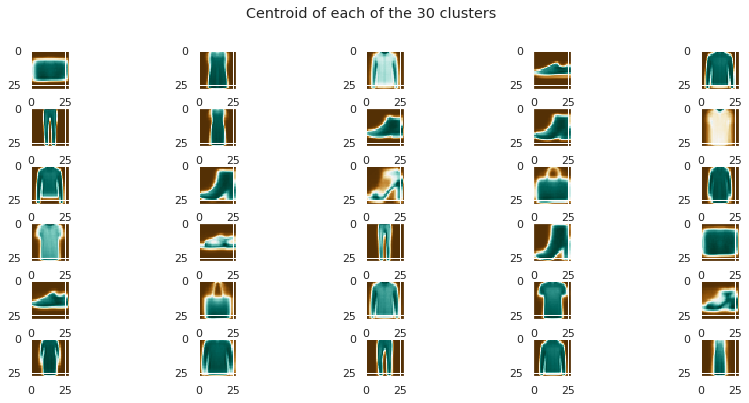

In [ ]:
kmeans_model = KMeans(n_clusters=30,max_iter=100,tol=0.001,random_state=1).fit(X_train)

#Show the centroid for k=10
fig, axs = plt.subplots(6,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('Centroid of each of the 30 clusters')
for i in range(0,30):
  z=kmeans_model.cluster_centers_[i].reshape(28,28)
  # make a meshgrid
  xs, ys = np.meshgrid(28,28)
  # display the image on the axes
  axs[i].imshow(z,cmap=plt.cm.BrBG)

Text(0.5, 1.0, ' Silhouette score against cluster size')

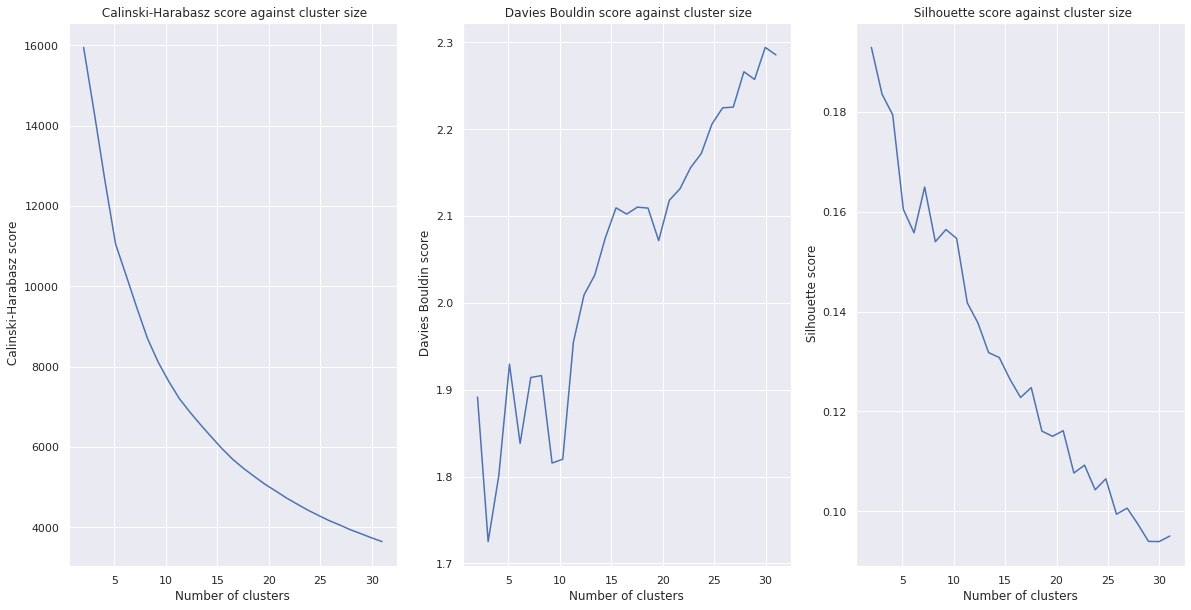

In [ ]:
#Plot the  Calinski-Harabasz (CH) score to evaluate the quality of clusterings as a function of k
import seaborn as sns

x=np.linspace(2,31,len(CH_Score))
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
sns.set(style="darkgrid")
ax1=sns.lineplot(x,CH_Score)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel(' Calinski-Harabasz score')
ax1.set_title(' Calinski-Harabasz score against cluster size')

#Plot Davies Bouldin Index
#To evaluate intra-cluster similarity and inter-cluster differences, use Davies Bouldin Index
ax2 = fig.add_subplot(132)
sns.set(style="darkgrid")
ax2 = sns.lineplot(x,DB_Score)
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel(' Davies Bouldin score')
ax2.set_title(' Davies Bouldin score against cluster size')

#Plot Silhouette score
#To evaluate the pairwise difference of between and within-cluster distances
ax3 = fig.add_subplot(133)
sns.set(style="darkgrid")
ax3 = sns.lineplot(x,SS_Score)
ax3.set_xlabel('Number of clusters')
ax3.set_ylabel(' Silhouette score')
ax3.set_title(' Silhouette score against cluster size')


The best case for us is to use 10 clusters and each of the centroids represents 1 class but it is unlikely to happen since pictures can have similar structure or pixel and k-means algorithm are likely to classify them into same cluster. So we use 30 clusters to play around. When we plot centriods for the 30 clusters, the 10 classes in data can be found within the 30 figures. Also we can see when k=10, Davies Bouldin score has a local minimum and little peak in silhouette score.

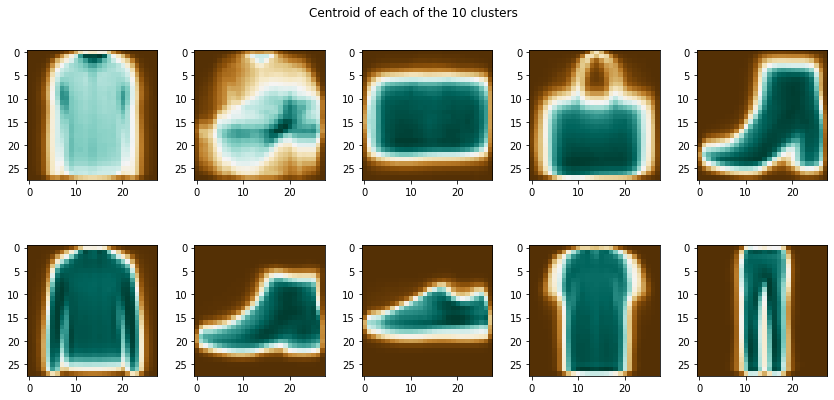

In [ ]:
kmeans_model = KMeans(n_clusters=10,max_iter=100,tol=0.001,random_state=1).fit(X_train)

#Show the centroid for k=10
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('Centroid of each of the 10 clusters')
for i in range(0,10):
  z=kmeans_model.cluster_centers_[i].reshape(28,28)
  # make a meshgrid
  xs, ys = np.meshgrid(28,28)
  # display the image on the axes
  axs[i].imshow(z,cmap=plt.cm.BrBG)

### Use the k-means clustering with k=10 as a kNN classifier for the test set.
To use k-means clustering with k=10 as a KNN classifier for the test test. I will first assign each cluster a label by finding the highest number of true label in that cluster with a dictionary to store the value. Next i assignned the predicted cluster label with the label stored in the dictionary and find the accuracy with the test set true label.

In [ ]:
#Find each cluster is assigned to the original label
def cluster_label(real_label,Kmeans_model):
    Original_label = dict()
    for i in range(Kmeans_model.n_clusters):
        labels = []
        labels.append(np.squeeze(real_label.values)[real_label.index[Kmeans_model.labels_==i]])
        #Get the cummulative amount of label in each cluster
        cummulative = np.bincount(labels[0])
        #list the cluster with the Original_label value
        if np.argmax(cummulative) in Original_label:
            Original_label[np.argmax(cummulative)].append(i)
        else:
            Original_label[np.argmax(cummulative)] = [i]
    return Original_label 

In [ ]:
#Use the k-means clustering with k=10 as a kNN classifier for the test set
kmeans_model_test = KMeans(n_clusters=10).fit(X_test)

y_predict = kmeans_model_test.predict(X_test)
Cluster_label = cluster_label(Y_test,kmeans_model_test)

print('Label assigned with clusters',Cluster_label)
#Prediction assigns data to cluster, so we need to reassign it to original label 
Y_predict = np.zeros(len(y_predict))
for i, cluster_ind in enumerate(y_predict):
  for j, original_label in Cluster_label.items():
      if cluster_ind in original_label:
          Y_predict[i] = j   

Label assigned with clusters {5: [0], 8: [1, 8], 3: [2], 6: [3], 4: [4], 0: [5], 9: [6], 1: [7], 7: [9]}


              precision    recall  f1-score   support

 T-shirt/top       0.49      0.80      0.61       618
    Trousers       0.89      0.65      0.75      1376
    Pullover       0.00      0.00      0.00         0
       Dress       0.37      0.42      0.39       893
        Coat       0.59      0.38      0.46      1563
      Sandal       0.66      0.51      0.58      1292
       Shirt       0.35      0.28      0.31      1253
     Sneaker       0.83      0.67      0.74      1246
         Bag       0.74      0.94      0.83       787
 Ankle boots       0.82      0.85      0.83       972

    accuracy                           0.58     10000
   macro avg       0.58      0.55      0.55     10000
weighted avg       0.65      0.58      0.60     10000



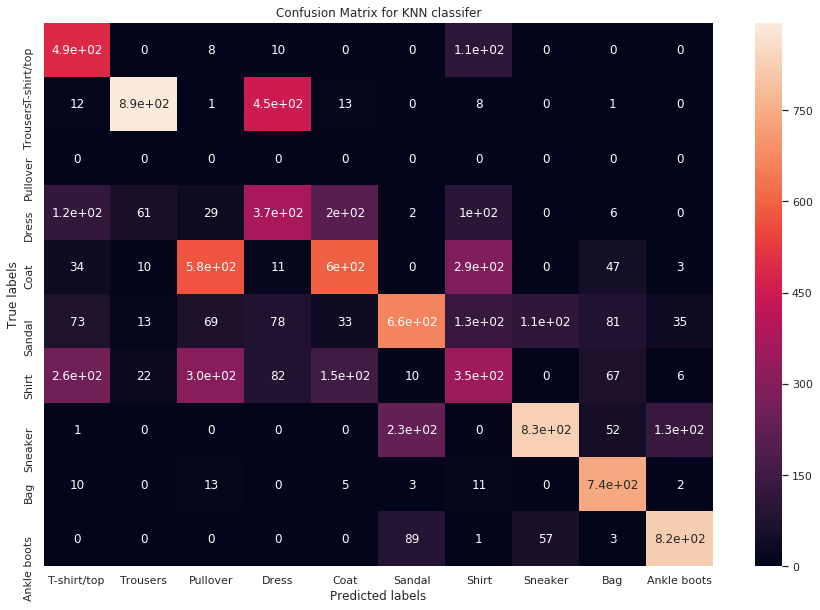

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as confusion_matrix
#Prediction on test data

target_name =['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']
print(classification_report(Y_predict,Y_test,target_names=target_name))


ax=plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax=sns.heatmap(confusion_matrix(Y_predict,Y_test), annot=True);

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for KNN classifer'); 
ax.xaxis.set_ticklabels(['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']); 
ax.yaxis.set_ticklabels(['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']);

## Task 2.2  Supervised classification of the training set

### 2.2.1 MLP neural network supervised classification

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F


input_size = 784  # 28 x 28  
hidden_size = 100
num_classes = 10  #4 classes(unacceptable,acceptable,good,very good)
num_epochs = 30
batch_size = 128
learning_rate = 0.005


In [ ]:
# prepare data
X_train_NN = torch.from_numpy(X_train.values).float()
Y_train_NN = torch.from_numpy(np.array(Y_train_N))

X_test_NN = torch.from_numpy(X_test.values).float()
Y_test_NN = torch.from_numpy(np.array(Y_test_N))



# loading data 

train = torch.utils.data.TensorDataset(X_train_NN, Y_train_NN)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)

test = torch.utils.data.TensorDataset(X_test_NN, Y_test_NN)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)


In [ ]:
def NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate):
  Y_true=[]
  Y_predic=[]
  Y_true_train=[]
  Y_predic_train=[]
  #Set up the Neural Network
  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          self.fc1 = nn.Linear(input_size, hidden_size)
          self.fc2 = nn.Linear(hidden_size, hidden_size)
          self.fc3 = nn.Linear(hidden_size, hidden_size)
          self.fc4 = nn.Linear(hidden_size, num_classes)
 
      
      def forward(self, x):
          out = F.relu(self.fc1(x))
          out = F.relu(self.fc2(out))
          out = F.relu(self.fc3(out))
          out = self.fc4(out)
          return F.log_softmax(out, dim=1)

  #Call the NN
  net = NeuralNet(input_size, hidden_size, num_classes)

  #Loss function and optimiser

  criterion = nn.NLLLoss()

  optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)  
  total_step = len(train_loader)
  loss_values = []
  for epoch in range(num_epochs+1):

  ###################
  # train the model #
  ###################
    net.train()
    train_loss = 0.0

    for i, (descriptor, labels) in enumerate(train_loader):
      
      labels=labels.squeeze()
      
        
    # forward pass
      outputs = net(descriptor)
      loss = criterion(outputs, labels)
        
    # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

    # update loss
      train_loss += loss.item()
        
    loss_values.append(train_loss/total_step)
  
#Evaluate the performance 
  net.eval()

  correct = 0
  total = 0
  for descriptor, labels in test_loader:
    labels = labels.squeeze()
    outputs = net(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    #Save the prediction and true rating value
    Y_true.append(labels.numpy())
    Y_predic.append(predicted.numpy())

  correct = 0
  total = 0
  for descriptor, labels in train_loader:
    labels = labels.squeeze()
    outputs = net(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    #Save the prediction and true rating value
    Y_true_train.append(labels.numpy())
    Y_predic_train.append(predicted.numpy())

  return loss_values,Y_true,Y_predic,Y_true_train,Y_predic_train

              precision    recall  f1-score   support

 T-shirt/top     0.8180    0.8205    0.8192       997
    Trousers     0.9750    0.9799    0.9774       995
    Pullover     0.7730    0.8171    0.7945       946
       Dress     0.8820    0.9009    0.8914       979
        Coat     0.8800    0.7580    0.8144      1161
      Sandal     0.9430    0.9564    0.9496       986
       Shirt     0.6540    0.7195    0.6852       909
     Sneaker     0.9250    0.9353    0.9301       989
         Bag     0.9690    0.9585    0.9637      1011
 Ankle boots     0.9630    0.9377    0.9502      1027

    accuracy                         0.8782     10000
   macro avg     0.8782    0.8784    0.8776     10000
weighted avg     0.8810    0.8782    0.8788     10000



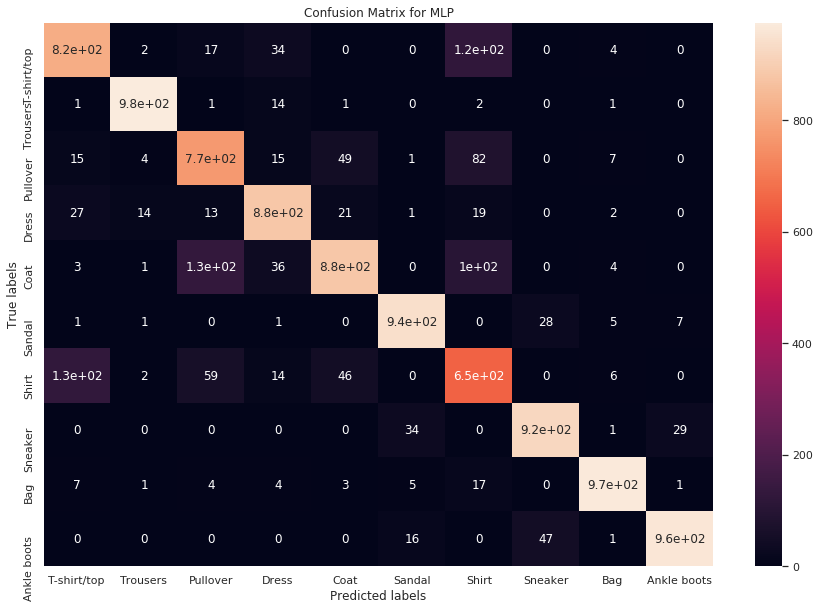

In [ ]:
[loss,Y_true_NN,Y_predic_NN,Y_true_NN_train,Y_predic_NN_train]=NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate)  


#Concate the data set
Y_true_NN=np.concatenate(Y_true_NN).ravel()
Y_predic_NN=np.concatenate(Y_predic_NN).ravel()
Y_true_NN_train=np.concatenate(Y_true_NN_train).ravel()
Y_predic_NN_train=np.concatenate(Y_predic_NN_train).ravel()

target_name =['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']
print(classification_report(Y_predic_NN,Y_true_NN, target_names=target_name,digits=4))


ax=plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax=sns.heatmap(confusion_matrix(Y_predic_NN,Y_true_NN), annot=True);

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for MLP'); 
ax.xaxis.set_ticklabels(['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']); 
ax.yaxis.set_ticklabels(['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']);


### Task 2.2.2 Convolutional neural network (CNN) supervised classification

In [ ]:
def CNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate):
  Y_true=[]
  Y_predic=[]
  Y_true_train=[]
  Y_predic_train=[]
  class ConvNet(nn.Module):
    Y_true=[]
    Y_predic=[]
    Y_true_train=[]
    Y_predic_train=[]
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            #Our architechture has 6 channels, padding=0, stride=1
            nn.Conv2d(1, 6, kernel_size=5, stride=1),
            nn.ReLU(),
            #Reduce matrix size by half
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            #Our architechture has 16 channels, padding=0, stride=1
            nn.Conv2d(6, 16, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
      
        self.fc1 = nn.Linear(4*4*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return F.log_softmax(out, dim=1)

  net = ConvNet(num_classes)

  #Loss function and optimiser

  criterion = nn.NLLLoss()

  optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)  
  total_step = len(train_loader)
  loss_values = []
  for epoch in range(num_epochs+1):

  ###################
  # train the model #
  ###################
    net.train()
    train_loss = 0.0

    for i, (descriptor, labels) in enumerate(train_loader):
      
    
      labels=labels.squeeze()
    # Reshape the data to be able to feed in the model
      descriptor = descriptor.reshape(len(labels),-1,28,28)  
    # forward pass
      outputs = net(descriptor)
      loss = criterion(outputs, labels)
        
    # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

    # update loss
      train_loss += loss.item()
        
    loss_values.append(train_loss/total_step)

  #Evaluate the performance 
  net.eval()

  correct = 0
  total = 0
  for descriptor, labels in test_loader:
    labels = labels.squeeze()
    descriptor = descriptor.reshape(len(labels),-1,28,28)
    outputs = net(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    #Save the prediction and true rating value
    Y_true.append(labels.numpy())
    Y_predic.append(predicted.numpy())

  correct = 0
  total = 0
  for descriptor, labels in train_loader:
    labels = labels.squeeze()
    descriptor = descriptor.reshape(len(labels),-1,28,28)
    outputs = net(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    #Save the prediction and true rating value
    Y_true_train.append(labels.numpy())
    Y_predic_train.append(predicted.numpy())

  return loss_values,Y_true,Y_predic,Y_true_train,Y_predic_train

              precision    recall  f1-score   support

 T-shirt/top     0.8350    0.8075    0.8210      1034
    Trousers     0.9860    0.9695    0.9777      1017
    Pullover     0.8260    0.8035    0.8146      1028
       Dress     0.8770    0.9032    0.8899       971
        Coat     0.8780    0.7641    0.8171      1149
      Sandal     0.9420    0.9833    0.9622       958
       Shirt     0.5710    0.7330    0.6419       779
     Sneaker     0.9130    0.9461    0.9293       965
         Bag     0.9740    0.9521    0.9629      1023
 Ankle boots     0.9780    0.9089    0.9422      1076

    accuracy                         0.8780     10000
   macro avg     0.8780    0.8771    0.8759     10000
weighted avg     0.8853    0.8780    0.8801     10000



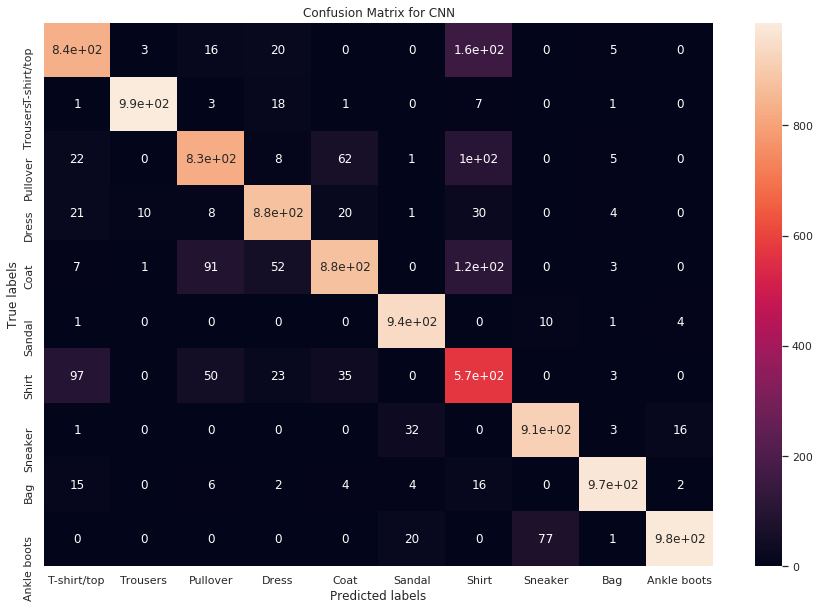

In [ ]:

[loss,Y_true_NN,Y_predic_NN,Y_true_NN_train,Y_predic_NN_train]=CNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate) 


#Concate the data set
Y_true_NN=np.concatenate(Y_true_NN).ravel()
Y_predic_NN=np.concatenate(Y_predic_NN).ravel()
Y_true_NN_train=np.concatenate(Y_true_NN_train).ravel()
Y_predic_NN_train=np.concatenate(Y_predic_NN_train).ravel()


target_name =['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']
print(classification_report(Y_predic_NN,Y_true_NN, target_names=target_name,digits=4))


ax=plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax=sns.heatmap(confusion_matrix(Y_predic_NN,Y_true_NN), annot=True);

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for CNN'); 
ax.xaxis.set_ticklabels(['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']); 
ax.yaxis.set_ticklabels(['T-shirt/top', 'Trousers', 'Pullover' ,'Dress', 'Coat' ,'Sandal' ,'Shirt', 'Sneaker' ,'Bag' ,'Ankle boots']);


### Task 2.2.3 Comparisons of the classifiers

For MLP classifer we have:
$$\begin{aligned} &\text{Input layer=} 28 \times 28 (input  node) \cdot 100 (neuron) +1 = 78401 \\ &\text{Hidden layer=} 100 (neuron） \cdot 100 (neuron) +1 = 10001\\ &\text{Hidden layer=} 100 (neuron） \cdot 100 (neuron) +1 = 10001\\ &\text{Output layer=} 100 (neuron） \cdot 10 (neuron) +1 = 1001\\ &\text{Total parameter}= 99404  \end{aligned}$$ 
For CNN classifier we have:
$$\begin{aligned} &\text{Convolution layer=} (24 \times 24 (Matrix size)+1) \cdot 6 (Channel) = 3462 \\ &\text{Convolution layer=} (8 \times 8 (Matrix size)+1) \cdot 16 (Channel) = 1040\\ &\text{Full connection layer=} 4\times4\times16 (neuron） \cdot 120 (neuron) +1 = 30721\\ &\text{Full connection layer=} 120 (neuron） \cdot 84 (neuron) +1 = 10081\\
&\text{Full connection layer=} 84 (neuron） \cdot 10 (neuron) +1 = 841\\ 
&\text{Total parameter}= 46145 \end{aligned}$$ 


CNN and MLP are both feed-foward nerual network, they both have similiar accuracy score with current set of hyperparameters. CNN involves half the amount of parameter than MLP, since CNN is performing matrix reduction. As we see MLP has much more parameters, it coud lead to overfitting and having too many parameter slowers the efficiency of the MLP classifier. For this objective, CNN seems to be better than MLP in image processing.

Using given parameters and based on the results above, the two supervised learnng methods performs better than the unsupervised learning method. For k-means clustering, we only used 10 means cluster, the data has 10 classes therefore we need to increase more cluster to get better accuracy. The image data are not that consectutive and k-means tend to have better performance with consectutive data since it calculates the distance between data points. On the other hand, CNN is popular in image processing and can be thought as automatic feature extractors from the image. The MLP classifier has symmectric errors in prediction and CNN classifier has linear errors as we see from confusion matrix plot.

To achieve higher accuracy:
* I first deduced the kernel size in convolutional layer so that we can capture more low feature information. For the first convolutional layer, I changed kernel size to 3 so that it will convolut to a 26x26 matrix. For the second one, I changed the kernel size to 4 so that it will convolut to 5x5 matrix. 
* The second step is to increase the number of nodes in full connection layer so we can better fit the model and weight the feature vector. 


In [ ]:
from sklearn.model_selection import StratifiedKFold
#Set to stratifed 5 fold method
cv = StratifiedKFold(n_splits=5, random_state=42)
def Modified_CNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate):
  Y_true=[]
  Y_predic=[]
  Y_true_train=[]
  Y_predic_train=[]
  class ConvNet(nn.Module):
    Y_true=[]
    Y_predic=[]
    Y_true_train=[]
    Y_predic_train=[]
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            #Our architechture has 6 channels, padding=0, stride=1,deduce kernel size to 3
            nn.Conv2d(1, 6, kernel_size=3, stride=1),
            nn.ReLU(),
            #Reduce matrix size by half
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            #Our architechture has 16 channels, padding=0, stride=1
            nn.Conv2d(6, 16, kernel_size=4, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
      
        self.fc1 = nn.Linear(5*5*16, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100,num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return F.log_softmax(out, dim=1)

  net = ConvNet(num_classes)

  for (train_index,test_index) in cv.split(X_train,Y_train):
    X_train_sp, X_test_sp = X_train.loc[train_index], X_train.loc[test_index]
    Y_train_sp, Y_test_sp = Y_train.loc[train_index], Y_train.loc[test_index]


    # prepare data
    X_train_NN_sp = torch.from_numpy(X_train_sp.values).float()
    Y_train_NN_sp = torch.from_numpy(np.array(Y_train_sp))
    X_test_NN_sp = torch.from_numpy(X_test_sp.values).float()
    Y_test_NN_sp = torch.from_numpy(np.array(Y_test_sp))

  # loading data 
    train_sp = torch.utils.data.TensorDataset(X_train_NN_sp, Y_train_NN_sp)
    train_loader_sp = torch.utils.data.DataLoader(train_sp, batch_size=batch_size)

    test_sp = torch.utils.data.TensorDataset(X_test_NN_sp, Y_test_NN_sp) 
    test_loader_sp = torch.utils.data.DataLoader(test_sp, batch_size=batch_size)
  #Loss function and optimiser

    criterion = nn.NLLLoss()

    optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)  
    total_step = len(train_loader_sp)
    loss_values = []
    for epoch in range(num_epochs+1):

    ###################
    # train the model #
    ###################
      net.train()
      train_loss = 0.0

      for i, (descriptor, labels) in enumerate(train_loader_sp):
        
      
        labels=labels.squeeze()
      # Reshape the data to be able to feed in the model
        descriptor = descriptor.reshape(len(labels),-1,28,28)  
      # forward pass
        outputs = net(descriptor)
        loss = criterion(outputs, labels)
          
      # backward and optimise
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

      # update loss
        train_loss += loss.item()
          
      loss_values.append(train_loss/total_step)

    #Evaluate the performance 
    net.eval()

    correct = 0
    total = 0
    for descriptor, labels in test_loader_sp:
      labels = labels.squeeze()
      descriptor = descriptor.reshape(len(labels),-1,28,28)
      outputs = net(descriptor)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      #Save the prediction and true rating value
      Y_true.append(labels.numpy())
      Y_predic.append(predicted.numpy())

    correct = 0
    total = 0
    for descriptor, labels in train_loader_sp:
      labels = labels.squeeze()
      descriptor = descriptor.reshape(len(labels),-1,28,28)
      outputs = net(descriptor)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      #Save the prediction and true rating value
      Y_true_train.append(labels.numpy())
      Y_predic_train.append(predicted.numpy())

  return loss_values,Y_true,Y_predic,Y_true_train,Y_predic_train

In [ ]:
from sklearn.metrics import classification_report
#Try to acheive higher accuracy for CNN using stratified K-fold

[loss,Y_true_NN,Y_predic_NN,Y_true_NN_train,Y_predic_NN_train]=Modified_CNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate) 


#Concate the data set
Y_true_NN=np.concatenate(Y_true_NN).ravel()
Y_predic_NN=np.concatenate(Y_predic_NN).ravel()
Y_true_NN_train=np.concatenate(Y_true_NN_train).ravel()
Y_predic_NN_train=np.concatenate(Y_predic_NN_train).ravel()


print(classification_report(Y_predic_NN,Y_true_NN, target_names=target_name,digits=4))

              precision    recall  f1-score   support

 T-shirt/top     0.8925    0.9218    0.9069      5809
    Trousers     0.9867    0.9946    0.9906      5952
    Pullover     0.8712    0.9122    0.8912      5730
       Dress     0.9563    0.9253    0.9406      6201
        Coat     0.9102    0.8754    0.8925      6238
      Sandal     0.9837    0.9797    0.9817      6024
       Shirt     0.8388    0.8358    0.8373      6022
     Sneaker     0.9498    0.9817    0.9655      5805
         Bag     0.9862    0.9811    0.9836      6031
 Ankle boots     0.9867    0.9567    0.9714      6188

    accuracy                         0.9362     60000
   macro avg     0.9362    0.9365    0.9361     60000
weighted avg     0.9367    0.9362    0.9363     60000



# Task 4: Dimensionality reduction of images 

## Task 4.1 Comparing PCA and NMF dimensionality reduction

In [ ]:
#Implement PCA
from sklearn.decomposition import PCA
pca_model=PCA(n_components=10,random_state=1).fit(X_train)


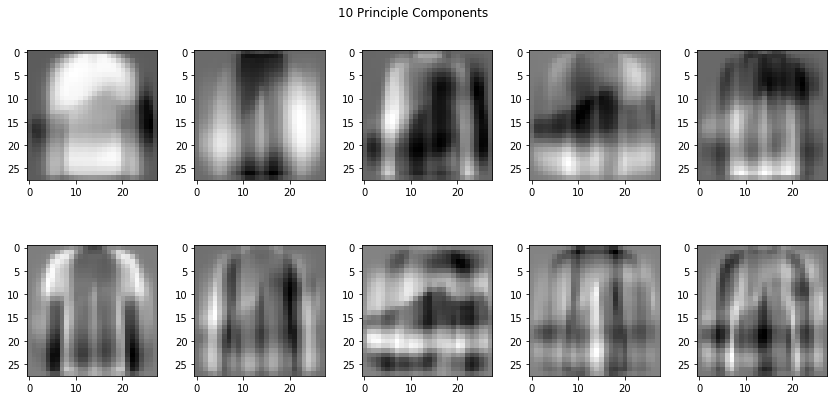

In [ ]:
#Visualize the 10 components
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('10 Principle Components')
for i in range(0,10):
  z=pca_model.components_[i].reshape(28,28)
  # make a meshgrid
  xs, ys = np.meshgrid(28,28)
  # display the image on the axes
  axs[i].imshow(z,cmap=plt.cm.gray)

In [ ]:
#Implement NMF 

from sklearn.decomposition import NMF
NMF_model = NMF(n_components=10, init='random', random_state=1).fit(X_train)

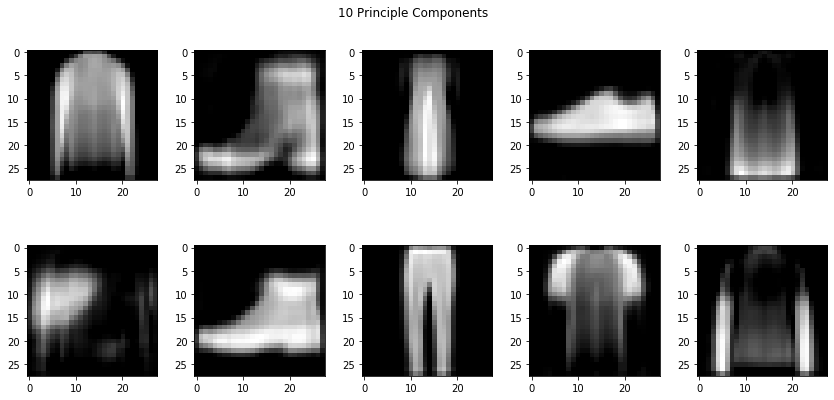

In [ ]:
#Visualize the 10 components
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('10 Principle Components')
for i in range(0,10):
  z=NMF_model.components_[i].reshape(28,28)
  # make a meshgrid
  xs, ys = np.meshgrid(28,28)
  # display the image on the axes
  axs[i].imshow(z,cmap=plt.cm.gray)

In [ ]:
from sklearn.metrics import explained_variance_score

#To measure the performance of dimensionality reduction, we use the explained variance ratio.

def Score(model , X, sc=explained_variance_score):
  predict = model.inverse_transform(model.transform(X))
  return sc(X,predict)

print(' Explained variace ratio of PCA on train set',Score(pca_model,X_train))

print(' Explained variace ratio of NMF on train set',Score(NMF_model,X_train))


 Explained variace ratio of PCA on train set 0.6070017219653197
 Explained variace ratio of NMF on train set 0.5857942531276338


For any given non-negative matrix V, NMF algorithm can find a non-negative matrix W and a non-negative matrix H, so as to satisfy, thus a non-negative matrix is decomposed into the product of left and right two non-negative matrices. An advantage for NMF is that it captures the most useful details, as we can see from the centroids, where PCA takes on too much information, it is the weighted average of all the information and we can't get much usefull information out of it but NMF has very clear image for us to identify the centroid class. There are lots of black pixel in the centroids of NMF, these represents the sparsity of the feature matrix where PCA doesn't have much and it helps us to distinguish the image.

## Task 4.2 Latent Dirichlet Allocation (LDA) applied to images:

In [ ]:
#Implement LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA

LDA_model = LDA(n_components=10,random_state=1).fit(X_train)


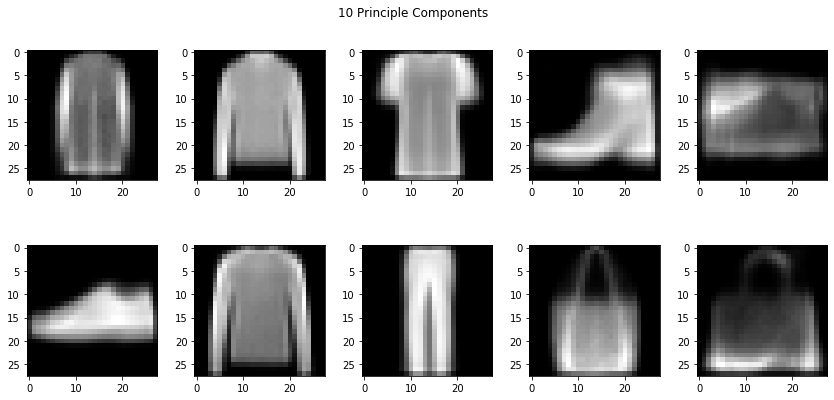

In [ ]:
#Visualize the 10 components
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
fig.suptitle('10 Principle Components')
for i in range(0,10):
  z=LDA_model.components_[i].reshape(28,28)
  # make a meshgrid
  xs, ys = np.meshgrid(28,28)
  # display the image on the axes
  axs[i].imshow(z,cmap=plt.cm.gray)

For each image, LDA would segment it into finite set of segments and compute each segment with respect to some feature vectors (i.e color histogram) to determine which cluster the segment is assigned in order to reduce the size of vocabulary. Then we can cluster the image by the frequency of members in cluster of segments occur in each image. Since our image data are distinguishble therefore we conclude LDA would work on this problem.